# Credit One Data Analysis

## Import Libraries

In [1]:
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl

# Sci-Kit Learn Regression estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Sci-Kit Learn Classifier estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split 

%matplotlib inline

# Initiate Seaborn graph background
import seaborn as sns 
sns.set()

## Import Data from .csv file, Pre-Processing and Data Transformation in C2T1

In [2]:
# Import data back in
df = pd.read_csv('Credit_One_Data.csv')

In [3]:
# Check data that was imported
df.head()

,Unnamed: 0,ID,Credit_Given,Gender,Education,Marital_Status,Age,PH_Sept_05,PH_Aug_05,PH_Jul_05,...,PAmt_Sept_05,PAmt_Aug_05,PAmt_Jul_05,PAmt_Jun_05,PAmt_May_05,PAmt_Apr_05,Client_Behavior,Gender_coded,Education_coded,Client_Behavior_coded
0,1,1,20000,female,university,1,24,2,2,-1,...,0,689,0,0,0,0,default,2,2,1
1,2,2,120000,female,university,2,26,-1,2,0,...,0,1000,1000,1000,0,2000,default,2,2,1
2,3,3,90000,female,university,2,34,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,2,2,0
3,4,4,50000,female,university,1,37,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,2,2,0
4,5,5,50000,male,university,1,57,-1,0,-1,...,2000,36681,10000,9000,689,679,not default,1,2,0


In [4]:
# Add features for gender, education, and client behavio to have numerical data types for the predictive model. 
df['Marriage_Status']=df['Marital_Status']
codings = {"Marriage_Status": {0: 'Other', 1: 'Married', 2: 'Single', 3: 'Divorced'}} 
df = df.replace(codings)
df.head()

,Unnamed: 0,ID,Credit_Given,Gender,Education,Marital_Status,Age,PH_Sept_05,PH_Aug_05,PH_Jul_05,...,PAmt_Aug_05,PAmt_Jul_05,PAmt_Jun_05,PAmt_May_05,PAmt_Apr_05,Client_Behavior,Gender_coded,Education_coded,Client_Behavior_coded,Marriage_Status
0,1,1,20000,female,university,1,24,2,2,-1,...,689,0,0,0,0,default,2,2,1,Married
1,2,2,120000,female,university,2,26,-1,2,0,...,1000,1000,1000,0,2000,default,2,2,1,Single
2,3,3,90000,female,university,2,34,0,0,0,...,1500,1000,1000,1000,5000,not default,2,2,0,Single
3,4,4,50000,female,university,1,37,0,0,0,...,2019,1200,1100,1069,1000,not default,2,2,0,Married
4,5,5,50000,male,university,1,57,-1,0,-1,...,36681,10000,9000,689,679,not default,1,2,0,Married


In [5]:
# Verify the datatype of each feature and dependent variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             30000 non-null  int64 
 1   ID                     30000 non-null  int64 
 2   Credit_Given           30000 non-null  int64 
 3   Gender                 30000 non-null  object
 4   Education              30000 non-null  object
 5   Marital_Status         30000 non-null  int64 
 6   Age                    30000 non-null  int64 
 7   PH_Sept_05             30000 non-null  int64 
 8   PH_Aug_05              30000 non-null  int64 
 9   PH_Jul_05              30000 non-null  int64 
 10  PH_Jun_05              30000 non-null  int64 
 11  PH_May_05              30000 non-null  int64 
 12  PH_Apr_05              30000 non-null  int64 
 13  Amt_Sept_05            30000 non-null  int64 
 14  Amt_Aug_05             30000 non-null  int64 
 15  Amt_Jul_05         

### Attribute information

```
Credit Given (NT dollar): both the individual consumer credit and his/her family (supplementary) credit.
Gender (1 = male; 2 = female).
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
Age (year).
Payment History. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  PH_Sept_05 = the repayment status in September, 2005; 
  PH_Aug_05= the repayment status in August, 2005; . . .;
  PH_Apr_05 = the repayment status in April, 2005.
  The measurement scale for the repayment status is:
    -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 
    1 = payment delay for one month; 2 = payment delay for two months; . . .; 
    8 = payment delay for eight months; 9 = payment delay for nine months and above.
Amount of bill statement (NT dollar). 
  Amt_Sept_05 = amount of bill statement in September, 2005; 
  Amt_Aug_05 = amount of bill statement in August, 2005; . . .; 
  Amt_Apr_05 = amount of bill statement in April, 2005.
Amount of previous payment (NT dollar). 
  PAmt_Sept_05 = amount paid in September, 2005; 
  PAmt_Aug_05 = amount paid in August, 2005; . . .;
  PAmt_Apr_05 = amount paid in April, 2005.
Client_behavior; Y=0 then not default, Y=1 then default"
```

In [6]:
header = df.dtypes.index
print(header)

Index(['Unnamed: 0', 'ID', 'Credit_Given', 'Gender', 'Education',
       'Marital_Status', 'Age', 'PH_Sept_05', 'PH_Aug_05', 'PH_Jul_05',
       'PH_Jun_05', 'PH_May_05', 'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05',
       'Amt_Jul_05', 'Amt_Jun_05', 'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05',
       'PAmt_Aug_05', 'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05',
       'PAmt_Apr_05', 'Client_Behavior', 'Gender_coded', 'Education_coded',
       'Client_Behavior_coded', 'Marriage_Status'],
      dtype='object')


# Evaluate Regression Models

### Dependent variable: How much credit should customers have?

In [7]:
# To evaluate the amount of credit the customer should have, a linear regression model is needed. 
# y is the dependent variable.
# X are all the features we are interested in evaluating. 
y = df['Credit_Given']
print('Depedent variable: \n',y)

# X are all the features we are interested in evaluating.
X = pd.DataFrame(df, columns = ['Gender_coded','Education_coded','Marital_Status','Age','PH_Sept_05','PH_Aug_05', 'PH_Jul_05',
       'PH_Jun_05', 'PH_May_05', 'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05','Amt_Jul_05', 'Amt_Jun_05', 
       'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05','PAmt_Aug_05', 'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05',
       'PAmt_Apr_05','Client_Behavior_coded'])
print('\nFeatures:')
X.head()

Depedent variable: 
 0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: Credit_Given, Length: 30000, dtype: int64

Features:


,Gender_coded,Education_coded,Marital_Status,Age,PH_Sept_05,PH_Aug_05,PH_Jul_05,PH_Jun_05,PH_May_05,PH_Apr_05,...,Amt_Jun_05,Amt_May_05,Amt_Apr_05,PAmt_Sept_05,PAmt_Aug_05,PAmt_Jul_05,PAmt_Jun_05,PAmt_May_05,PAmt_Apr_05,Client_Behavior_coded
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Cross Validation

In [8]:
# Using Cross_val_score to run the algorithm against the training data, cv = number of folds being held out
# print(cross_val_score(algorithm, X, y, cv=3, scoring='R2'))

# Comparing regression algorithms: Random Forest Regressor vs. Linear Regression vs. Support Vector Regression
algos_Class = []
algos_Class.append(('Random Forest Regressor', RandomForestRegressor(random_state = 42)))
algos_Class.append(('Linear Regression', LinearRegression()))
algos_Class.append(('Support Vector Regression', SVR()))

#Classificaiton
results = []
names = []
for name, algo in algos_Class:
    result = cross_val_score(algo, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
        
# Print the cross_val_score
for i in range(len(names)):
    print(names[i],results[i].mean())


Random Forest Regressor 0.4673453784489194
Linear Regression 0.3515366557074287
Support Vector Regression -0.05035048364889335


From the Ski-Kit Learn website, a negative R2 score indicates that the model is arbitrarily worse. The SVR model was negative with 'poly', 'rbf', and 'sigmoid' kernals. The 'linear' kernal did not appear to converge and there may be a model breakdown because SVR is not a good model for this data set. 
Random Forest Regressor and Linear Regression look like better options. The Random Forest Regressor model has a better fit to the data. 

# Evaluate the Regression Models Train/Test Split

### Initiate the Train/Test Split Function

In [9]:
# Ski-Kit Learn Train/Test Split Function, uses featuresas  X and depedent variable (Amount Given) as y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

### Random Forest Regression

In [10]:
modelRF = RandomForestRegressor()

# Train Random Forest with the .fit method
modelRF.fit(X_train,y_train)

# Predict values to compare to the ground truth (y_test) using the predict method
RF_predictions = modelRF.predict(X_test)

# Calculate the R2 between y_test and RF_predictions
RF_predRsquared = r2_score(y_test,RF_predictions)

# Calculate the RMSE between y_test and RF_predictions
RF_rmse = sqrt(mean_squared_error(y_test, RF_predictions))

print('The Random Forest Regressor R Squared: %.3f' % RF_predRsquared)
print('The Random Forest Regresssor RMSE: %.3f' % RF_rmse)

The Random Forest Regressor R Squared: 0.472
The Random Forest Regresssor RMSE: 93531.652


In [11]:
# List of the most important features as calculated using Gini importance. 
print(X.dtypes.index, modelRF.feature_importances_)

Index(['Gender_coded', 'Education_coded', 'Marital_Status', 'Age',
       'PH_Sept_05', 'PH_Aug_05', 'PH_Jul_05', 'PH_Jun_05', 'PH_May_05',
       'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05', 'Amt_Jul_05', 'Amt_Jun_05',
       'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05', 'PAmt_Aug_05',
       'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05', 'PAmt_Apr_05',
       'Client_Behavior_coded'],
      dtype='object') [0.00925853 0.02876452 0.00871139 0.09346323 0.01495409 0.08035736
 0.01631078 0.0061718  0.00499733 0.00762538 0.09909416 0.03823516
 0.03575789 0.03322085 0.04077513 0.04293045 0.04909619 0.11910014
 0.06811758 0.04308478 0.04996995 0.1029096  0.00709374]


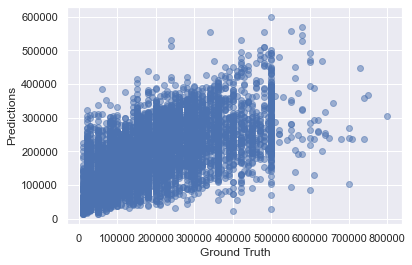

In [12]:
plt.scatter(y_test, RF_predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

The Random Forrest Regressor Plot shows a somewhat linear correlation with wide varuations. 

### Linear Regression

In [13]:
modelLR = LinearRegression()

# Train Random Forest with the .fit method
modelLR.fit(X_train,y_train)

# Predict values to compare to the ground truth (y_test) using the predict method
LR_predictions = modelLR.predict(X_test)

# Calculate the R2 between y_test and LR_predictions
LR_predRsquared = r2_score(y_test,LR_predictions)

# Calculate the RMSE between y_test and LR_predictions
LR_rmse = sqrt(mean_squared_error(y_test, LR_predictions))

print('The Random Forest Regressor R Squared: %.3f' % LR_predRsquared)
print('The Random Forest Regresssor RMSE: %.3f' % LR_rmse)

The Random Forest Regressor R Squared: 0.353
The Random Forest Regresssor RMSE: 103482.441


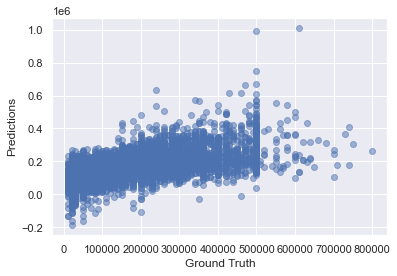

In [14]:
plt.scatter(y_test, LR_predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

The Linear Regression graph is a little more flat compared to the Random Forest Regression. 

### Support Vector Regression

In [15]:
modelSVR = SVR(kernel = 'rbf')

# Train Random Forest with the .fit method
modelSVR.fit(X_train,y_train)

# Predict values to compare to the ground truth (y_test) using the predict method
SVR_predictions = modelSVR.predict(X_test)

# Calculate the R2 between y_test and SVR_predictions
SVR_predRsquared = r2_score(y_test,SVR_predictions)

# Calculate the RMSE between y_test and SVR_predictions
SVR_rmse = sqrt(mean_squared_error(y_test, SVR_predictions))

print('The Random Forest Regressor R Squared: %.3f' % SVR_predRsquared)
print('The Random Forest Regresssor RMSE: %.3f' % SVR_rmse)

The Random Forest Regressor R Squared: -0.037
The Random Forest Regresssor RMSE: 131044.619


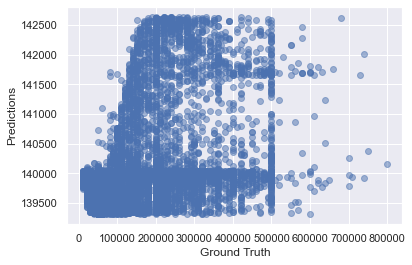

In [16]:
plt.scatter(y_test, SVR_predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

This graph looks like there are values that appear to have a flat shape. The SVR predictions appears to be the poorest model to fit the data. 

### All Regression Models compared to each other:

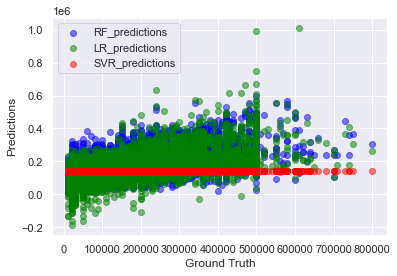

In [17]:
#plt.scatter([y_test,y_test,y_test], [RF_predictions, LR_predictions, SVR_predictions], c = ['blue','green','red'], alpha = 0.5)
plt.scatter(y_test, RF_predictions, c = 'blue', alpha = 0.5)
plt.scatter(y_test, LR_predictions, c = 'green', alpha = 0.5)
plt.scatter(y_test, SVR_predictions, c = 'red', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.legend(['RF_predictions', 'LR_predictions','SVR_predictions'])
plt.show();

### Review of Regression Models and Results

1. None of the algorithms provided a reasonable or acceptable result because all of them had a 
   low R2 value and high RMSE value. The models were a poor fit with the data.
2. Evaluating the Credit One default problem could be better approached using a classification model. 
3. Using Default as the dependent variable and see if there is a particular amount that tends to default can be
    determined using a Machine Learning Classifier.

# Evaluate the Classification Model 

## Dependent Variable = Default/Non-Default

Text(0.5, 1.0, 'Distribution of Credit Given to Customers')

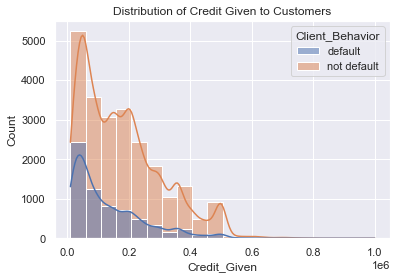

In [18]:
# Distribution of Credit Given
amt_dist = sns.histplot(x='Credit_Given', hue = 'Client_Behavior', data=df,bins=20, kde = True)
amt_dist.set_title("Distribution of Credit Given to Customers")

From the EDA, the defaulted loans increased for those that had a Credit < 500,000. A model can determine if there is a particular amount that is likely to default. 

In [19]:
# Create a new X that includes all features except for Default/Non-Default Status. 
X_default = pd.DataFrame(df, columns = ['Credit_Given','Gender_coded','Education_coded','Marital_Status','Age','PH_Sept_05','PH_Aug_05', 'PH_Jul_05',
       'PH_Jun_05', 'PH_May_05', 'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05','Amt_Jul_05', 'Amt_Jun_05', 
       'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05','PAmt_Aug_05', 'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05',
       'PAmt_Apr_05'])
y_default = df['Client_Behavior_coded']

### Cross Validation 

In [20]:
# Comparing two classification algorithms: Random Forest Classifier vs. Decision Tree Classifier
amount_algos_Class = []
amount_algos_Class.append(('Random Forest Classifier-d=4', RandomForestClassifier(criterion="entropy",max_depth=4)))
amount_algos_Class.append(('Random Forest Classifier-d=5', RandomForestClassifier(criterion="entropy",max_depth=5)))
amount_algos_Class.append(('Random Forest Classifier-d=6', RandomForestClassifier(criterion="entropy",max_depth=6)))
amount_algos_Class.append(('Random Forest Classifier-d=7', RandomForestClassifier(criterion="entropy",max_depth=7)))
amount_algos_Class.append(('Decision Tree Classifier-d=4', DecisionTreeClassifier(criterion="entropy",max_depth=4)))
amount_algos_Class.append(('Decision Tree Classifier-d=5', DecisionTreeClassifier(criterion="entropy",max_depth=5)))
amount_algos_Class.append(('Decision Tree Classifier-d=6', DecisionTreeClassifier(criterion="entropy",max_depth=6)))
amount_algos_Class.append(('Decision Tree Classifier-d=7', DecisionTreeClassifier(criterion="entropy",max_depth=7)))

#Classificaiton
amount_results = []
amount_names = []
for name, algo in amount_algos_Class:
    result = cross_val_score(algo, X_default, y_default, cv=3, scoring='accuracy')
    amount_names.append(name)
    amount_results.append(result)
    
# Print the cross_val_score
for i in range(len(amount_names)):
    print(amount_names[i],amount_results[i].mean())

Random Forest Classifier-d=4 0.8109999999999999
Random Forest Classifier-d=5 0.8126666666666665
Random Forest Classifier-d=6 0.8157333333333333
Random Forest Classifier-d=7 0.8184999999999999
Decision Tree Classifier-d=4 0.8196666666666667
Decision Tree Classifier-d=5 0.819
Decision Tree Classifier-d=6 0.8188
Decision Tree Classifier-d=7 0.8158333333333334


### Decision Tree Classifier Test/Train Split

In [21]:
# Here 70% is going to be used for training, while 30% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X_default,y_default, test_size = 0.3, random_state = 123)

# Modeling (Classification), defining algorithm method used to train the model.
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4)

# Run the training using fit method
model = algo_DTC.fit(X_train, y_train)

# Predictions using the model, input X_test, output is the prediction. 
preds = model.predict(X_test)

# Classification report, determine how accurate the model was between y_test(ground truth) and preds(prediction)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.66      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



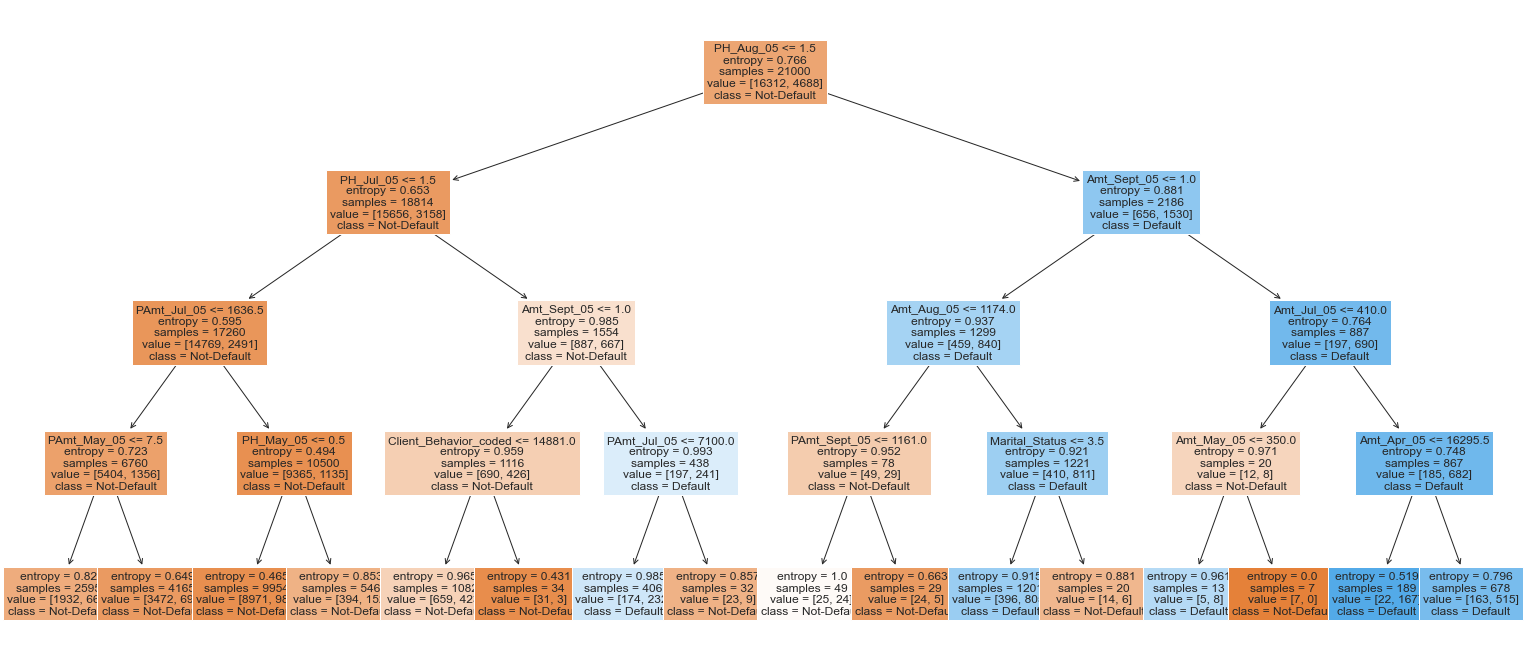

In [22]:
# Print the Decision Tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(27,12))
tree = plot_tree(model,feature_names=X.columns,class_names=['Not-Default','Default'], filled=True,fontsize=12)

In [23]:
# Calculate the importance of each feature:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

            feature  importance
5        PH_Sept_05       0.662
6         PH_Aug_05       0.166
18      PAmt_Aug_05       0.073
8         PH_Jun_05       0.033
20      PAmt_Jun_05       0.020
10        PH_Apr_05       0.020
11      Amt_Sept_05       0.007
15       Amt_May_05       0.004
22      PAmt_Apr_05       0.004
12       Amt_Aug_05       0.003
2   Education_coded       0.003
14       Amt_Jun_05       0.002
16       Amt_Apr_05       0.002
9         PH_May_05       0.000
7         PH_Jul_05       0.000
1      Gender_coded       0.000
13       Amt_Jul_05       0.000
4               Age       0.000
17     PAmt_Sept_05       0.000
3    Marital_Status       0.000
19      PAmt_Jul_05       0.000
21      PAmt_May_05       0.000
0      Credit_Given       0.000


The most important features for defaulting is Payment History > Amount of previous payment > Amount of bill statement. 
The least important feature for defaulting is the amount of Credit Given. 

Using all features, the defaulted/non-defaulted customers could be predicted with 82% accuracy. 

### Narrowing down number of features

In [24]:
# Create an X that includes only Paymeny History + Amount of Previous Payment + Amount of Bill Statement
X_payments = pd.DataFrame(df, columns = ['PH_Sept_05','PH_Aug_05', 'PH_Jul_05',
       'PH_Jun_05', 'PH_May_05', 'PH_Apr_05'])

# X_payments = pd.DataFrame(df, columns = ['PH_Sept_05','PH_Aug_05', 'PH_Jul_05',
#        'PH_Jun_05', 'PH_May_05', 'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05','Amt_Jul_05', 'Amt_Jun_05', 
#        'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05','PAmt_Aug_05', 'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05',
#        'PAmt_Apr_05'])

# Create an X with only Credit Given
X_Credit = pd.DataFrame(df, columns = ['Credit_Given'])

### Decision Tree Classifier Test/Train Split for narrowed features

In [25]:
# Evaluating Payment History Only
# Here 70% is going to be used for training, while 30% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X_payments,y_default, test_size = 0.3, random_state = 123)

# Modeling (Classification), defining algorithm method used to train the model.
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4)

# Run the training using fit method
model2 = algo_DTC.fit(X_train, y_train)

# Predictions using the model, input X_test, output is the prediction. 
preds2 = model2.predict(X_test)

# Classification report, determine how accurate the model was between y_test(ground truth) and preds(prediction)
print('Using Payment information only \n',classification_report(y_test,preds2))

Using Payment information only 
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7052
           1       0.66      0.38      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



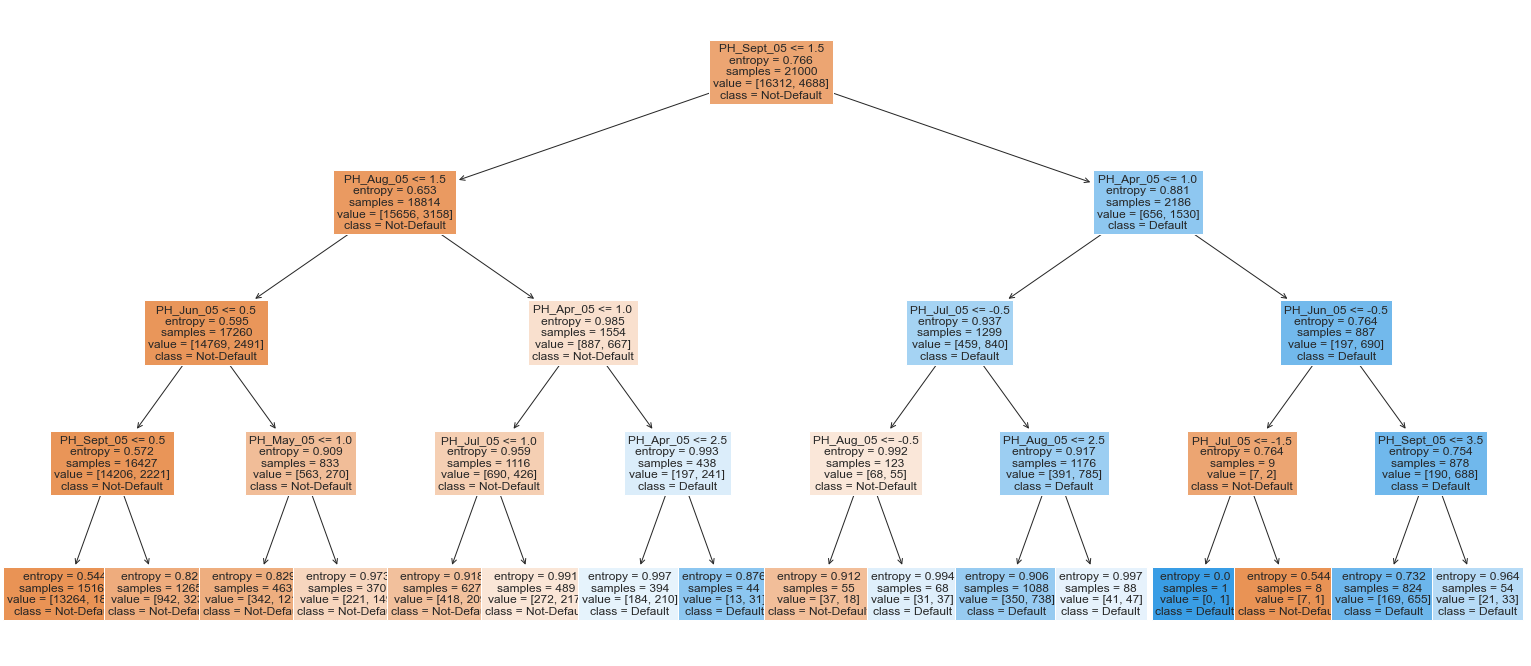

In [26]:
# Print the Decision Tree for Payment History Only
fig = plt.figure(figsize=(27,12))
tree = plot_tree(model2,feature_names=X_payments.columns,class_names = ['Not-Default','Default'], filled=True,fontsize=12)

In [27]:
# Calculate the importance of each feature for Payment History Only:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

      feature  importance
0  PH_Sept_05       0.732
1   PH_Aug_05       0.178
3   PH_Jun_05       0.052
5   PH_Apr_05       0.023
2   PH_Jul_05       0.011
4   PH_May_05       0.005


By using only the Payment History for the last 6months, the Decision Tree Classifier Model was able to predict a Customer's likelihood to default with 82% accuracy. The most important months were the most recent months (August and September). 

In [28]:
# Evaluating Credit Given Only:
# Here 70% is going to be used for training, while 30% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X_Credit,y_default, test_size = 0.3, random_state = 123)

# Modeling (Classification), defining algorithm method used to train the model.
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=4)

# Run the training using fit method
model3 = algo_DTC.fit(X_train, y_train)

# Predictions using the model, input X_test, output is the prediction. 
preds3 = model3.predict(X_test)

# Classification report, determine how accurate the model was between y_test(ground truth) and preds(prediction)
print('Using Payment information only \n',classification_report(y_test,preds3))

Using Payment information only 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The Train/Test Split function shows that the model was not able to defect any customers that defaulted. This means that the model was not able to accurately predict Default vs. Non-Default customers. 

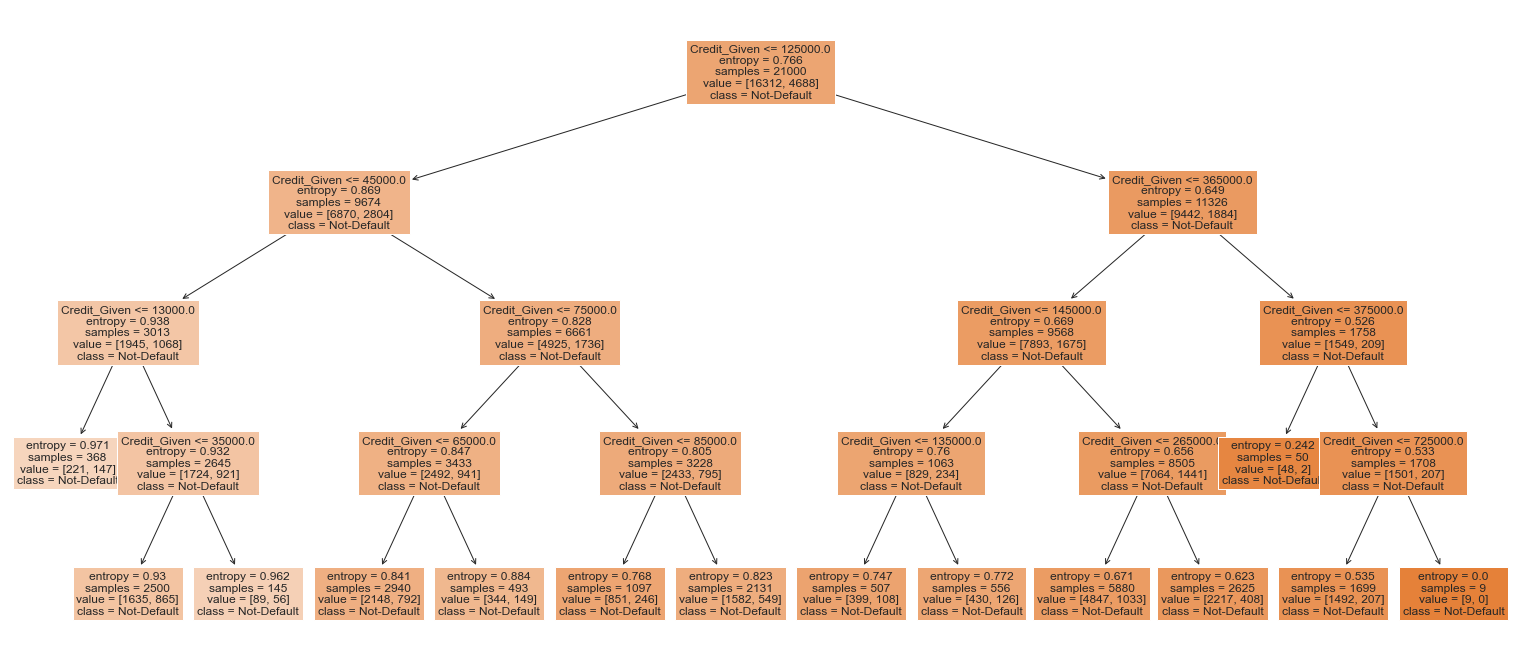

In [29]:
# Print the Decision Tree for Credit Given Only:
fig = plt.figure(figsize=(27,12))
tree = plot_tree(model3,feature_names=X_Credit.columns,class_names = ['Not-Default','Default'], filled=True,fontsize=12)

From the Decision Tree generated using Credit_Given as the only feature shows that this model can not predict when a customer has Defaulted. The amount of Credit Given is not a significant feature to determine whether or not a customer will Default. 

### Using Credit Given as a Dependent Variable to determine which features were likely used for Credit Limit. 

In [730]:
# Create a bins for Credit Given, use qcut to discretize the dependent variable
#bins = 5
# Credit_disc = pd.qcut(df['Credit_Given'], q=bins, labels=range(bins))
# Credit_disc.head()

# Credit_disc = pd.cut(df['Credit_Given'], bins = [9000, 300000, 100000, 150000, 200000, 300000, 400000, 1000000], labels = [1,2,3,4,5,6,7])
Credit_disc = pd.cut(df['Credit_Given'], bins = [9000, 40000, 79999, 500000, 1000000], labels = [1,2,3,4])

In [731]:
credit_df = pd.DataFrame(Credit_disc)
credit_df.value_counts()

Credit_Given
3               20562
2                4921
1                4311
4                 206
dtype: int64

In [732]:
# Create a new X that includes all features except for Credit Given. 
X_CG = pd.DataFrame(df, columns = ['Gender_coded','Education_coded','Marital_Status','Age'])

In [733]:
# Evaluating Credit_Given as the Dependent Variable
# Here 70% is going to be used for training, while 30% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X_CG, Credit_disc, test_size = 0.3, random_state = 123)

# Modeling (Classification), defining algorithm method used to train the model.
algo_DTC = DecisionTreeClassifier(criterion="entropy",max_depth=5)
#min_samples_leaf=100,min_samples_split=.1

# Run the training using fit method
model_CG = algo_DTC.fit(X_train, y_train)

# Predictions using the model, input X_test, output is the prediction. 
preds_CG = model_CG.predict(X_test)

# Classification report, determine how accurate the model was between y_test(ground truth) and preds(prediction)
print('Using Payment information only \n',classification_report(y_test,preds_CG))

Using Payment information only 
               precision    recall  f1-score   support

           1       0.60      0.16      0.25      1298
           2       0.31      0.06      0.09      1488
           3       0.72      0.98      0.83      6150
           4       0.00      0.00      0.00        64

    accuracy                           0.70      9000
   macro avg       0.41      0.30      0.29      9000
weighted avg       0.63      0.70      0.62      9000



/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morela/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [700]:
# Calculate the importance of each feature for Payment History Only:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(algo_DTC.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

           feature  importance
3              Age       0.583
1  Education_coded       0.305
0     Gender_coded       0.089
2   Marital_Status       0.023


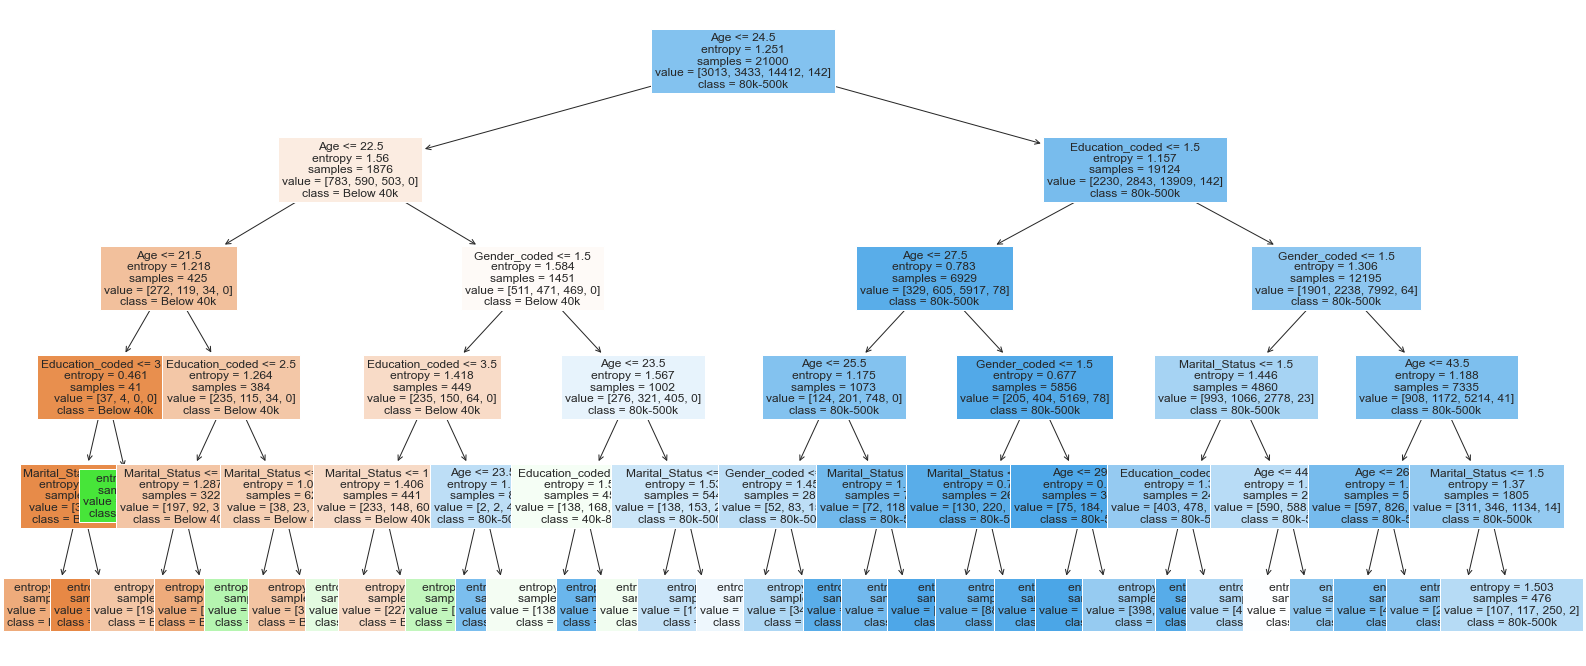

In [734]:
# Print the Decision Tree for Credit Given Only:
fig = plt.figure(figsize=(27,12))
tree = plot_tree(model_CG,feature_names=X_CG.columns,class_names = ['Below 40k','40k-80k','80k-500k','500k-1M'], filled=True,fontsize=12)